# Logistic Regression and Random Forest

# Feature Importance (Selection)

For this task, we are using SelectFromModel to identify the importance of each feature through a specific attribute.

In [39]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features and target
X = data_cleaned.drop(columns=['Late_delivery_risk'])
y = data_cleaned['Late_delivery_risk']

# Identify categorical columns BEFORE encoding
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode categorical columns (but do NOT scale numerical ones)
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split into training and testing sets (80% train, 20% test)
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.2, stratify=y)

# Train RandomForestClassifier on the unscaled (but encoded) dataset
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_encoded, y_train)

# Extract feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
print(feature_importance_df.head(20))

                            Feature  Importance
0     Days for shipment (scheduled)    0.094608
1460   Shipping Mode_Standard Class    0.073359
10                     shipping_day    0.061447
8                         order_day    0.056631
6            Order Profit Per Order    0.038977
5                  Order Item Total    0.034805
3           Order Item Profit Ratio    0.034604
1               Order Item Discount    0.033309
2          Order Item Discount Rate    0.028983
9                    shipping_month    0.027432
1459     Shipping Mode_Second Class    0.020303
7                     Product Price    0.017466
1348   Order Status_SUSPECTED_FRAUD    0.017004
4               Order Item Quantity    0.013797
1458         Shipping Mode_Same Day    0.010902
51                Customer State_PR    0.009598
14       Customer Segment_Corporate    0.009573
1345           Order Status_PENDING    0.008409
1347        Order Status_PROCESSING    0.008007
15     Customer Segment_Home Office    0

C:\Users\abmir\AppData\Local\Temp\ipykernel_19920\8243507.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




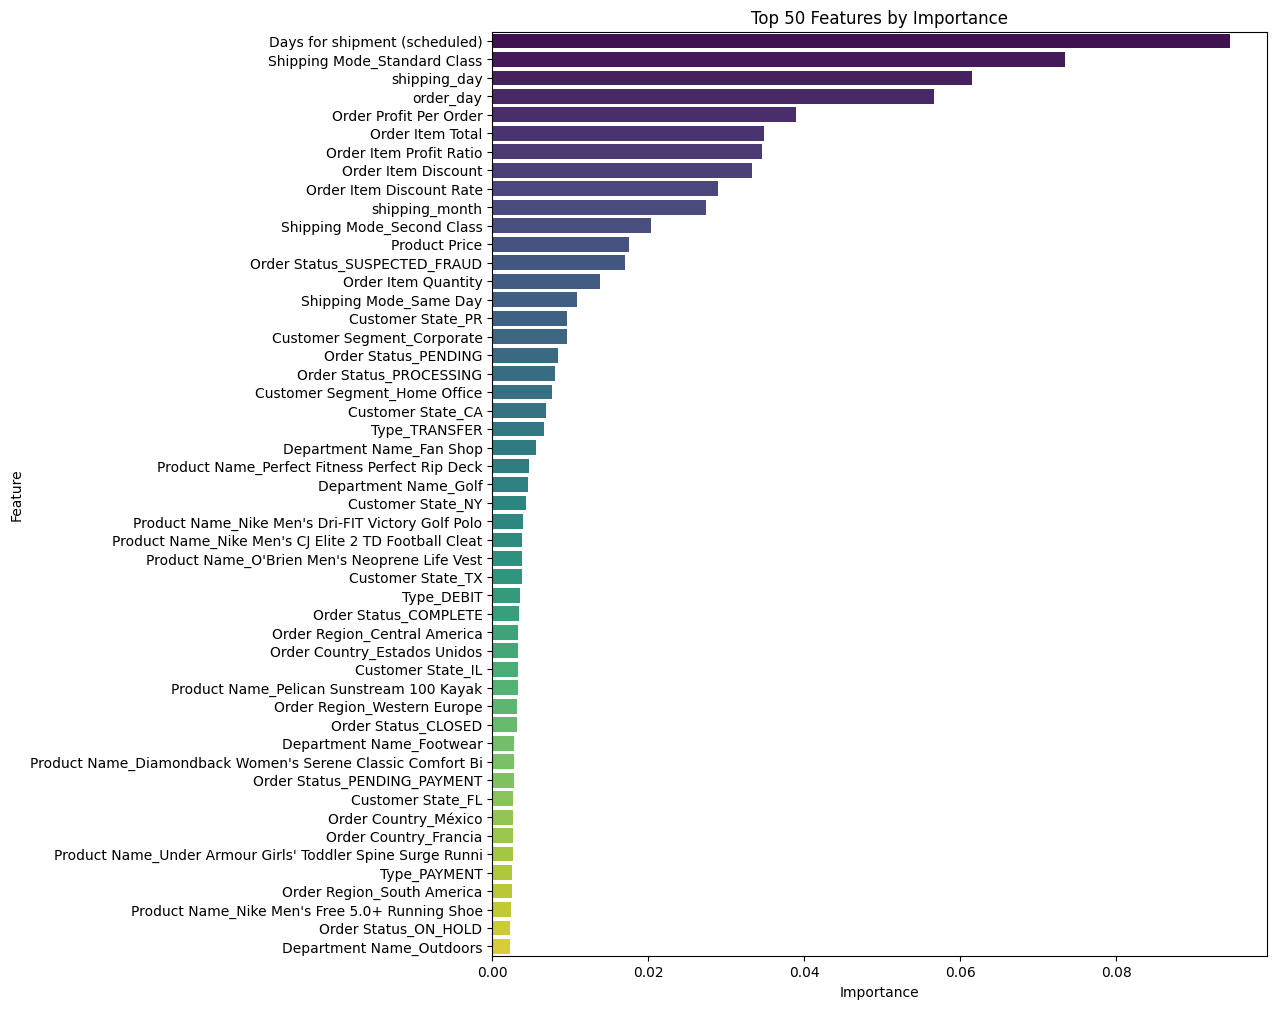

In [40]:
# plot feature importance in descending order of the top 50 features
plt.figure(figsize=(10, 12))
sns.barplot(data=feature_importance_df.head(50), x='Importance', y='Feature', palette='viridis')
plt.title('Top 50 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = X_train_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform ONLY the numerical columns in X_train
X_train_encoded[numerical_columns] = scaler.fit_transform(X_train_encoded[numerical_columns])

# Transform X_test using the same scaler (without refitting)
X_test_encoded[numerical_columns] = scaler.transform(X_test_encoded[numerical_columns])

In [42]:
X_train_encoded.head()

Days for shipment (scheduled)  Order Item Discount  \
153128                      -0.675977            -0.865716   
99410                       -0.675977             1.626552   
5252                         0.776298             2.372030   
48666                       -0.675977             0.559177   
175459                      -1.402114            -0.736181   

        Order Item Discount Rate  Order Item Profit Ratio  \
153128                 -1.296858                 0.026057   
99410                   1.038818                 0.613573   
5252                    1.184797                -0.134174   
48666                   1.476757                -2.537648   
175459                  0.308919                 0.720394   

        Order Item Quantity  Order Item Total  Order Profit Per Order  \
153128            -0.794993          2.557121                1.541815   
99410              1.996550          0.479878                0.926610   
5252               0.600778          0.904668                0.390025   
48666             -0.794993         -0.659543               -1.634105   
175459            -0.794993         -1.320414               -0.595444   

        Product Price  order_day  shipping_month  shipping_day  Type_DEBIT  \
153128       2.634542         12               4            15       False   
99410       -0.680309         11               8            13       False   
5252        -0.206664         14               2            18       False   
48666        0.077466         10               6            15        True   
175459      -0.680119          8               6            10        True   

        Type_PAYMENT  Type_TRANSFER  Customer Segment_Corporate  \
153128         False           True                       False   
99410          False           True                       False   
5252           False           True                        True   
48666          False          False                        True   
175459         False          False                       False   

        Customer Segment_Home Office  Customer State_95758  Customer State_AL  \
153128                         False                 False              False   
99410                          False                 False              False   
5252                           False                 False              False   
48666                          False                 False              False   
175459                         False                 False              False   

        Customer State_AR  Customer State_AZ  Customer State_CA  \
153128              False              False              False   
99410               False              False               True   
5252                False              False              False   
48666               False              False              False   
175459              False              False              False   

        Customer State_CO  Customer State_CT  Customer State_DC  \
153128              False              False              False   
99410               False              False              False   
5252                False              False              False   
48666               False              False              False   
175459              False              False              False   

        Customer State_DE  Customer State_FL  Customer State_GA  \
153128              False               True              False   
99410               False              False              False   
5252                False              False              False   
48666               False              False              False   
175459              False              False              False   

        Customer State_HI  Customer State_IA  Customer State_ID  \
153128              False              False              False   
99410               False              False              False   
5252                False              False              Fa

In [43]:
# check value count of y to see if the data is balanced or not
y_test.value_counts()

Late_delivery_risk
1    16355
0    13503
Name: count, dtype: int64

#### The chi-square tests shows that several variables are significantly associated with late delivery risk. For instance, payment type, delivery status, customer state, order status, order region and shipping mode all show statistically significant associations with late delivery risk (p < 0.05).

##### Hypothesis 1: Does the shipping mode (vs. first class or same day) increases the probability of late delivery? 
##### Hypothesis 2: Does the payment type affects late delivery risk because of differences in order processing time?
##### Hypothesis 3: Are orders from certain regions are causally more likely to experience late delivery due to logistical or infrastructural constraints?

#### Based on the analysis and hypothesis above we can implement Causal Inference.

## Modelling

Now that we have a list of the most important features. We can decide on how many of these features should be included in the model. For now, we can try with the top 50 and adjust as needed. 

In [44]:
# pick out the top 50 features
top_n = 20
top_features = feature_importance_df['Feature'].head(top_n).tolist()

In [45]:
# Filter the training and testing sets to include only the top features
X_train_top = X_train_encoded[top_features]
X_test_top = X_test_encoded[top_features]

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
 
# Set number of folds
k = 5  

# Initialize models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_top, y_train, cv=k, scoring='accuracy')  # You can use F1-score too
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression - Mean Accuracy: 0.7030, Std: 0.0018
Random Forest - Mean Accuracy: 0.8813, Std: 0.0054


In [47]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(100, 301, 50),  # [100, 150, 200, 250, 300]
    'max_depth': [10, 20, 30],  # Add None for unlimited depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV (choosing only 20 random combinations)
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=20,  # Randomly try 20 settings instead of all
                                   cv=3, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   random_state=42)

# Run Random Search on training data
random_search.fit(X_train_top, y_train)

# Get the best model
best_rf = random_search.best_estimator_

print("Best Random Forest Parameters:", random_search.best_params_)
print("Best Random Forest Cross-validated Score:", random_search.best_score_)


c:\Users\abmir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning:

invalid value encountered in cast



Best Random Forest Parameters: {'n_estimators': np.int64(250), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
Best Random Forest Cross-validated Score: 0.8660124349483428


Test Accuracy: 0.8813


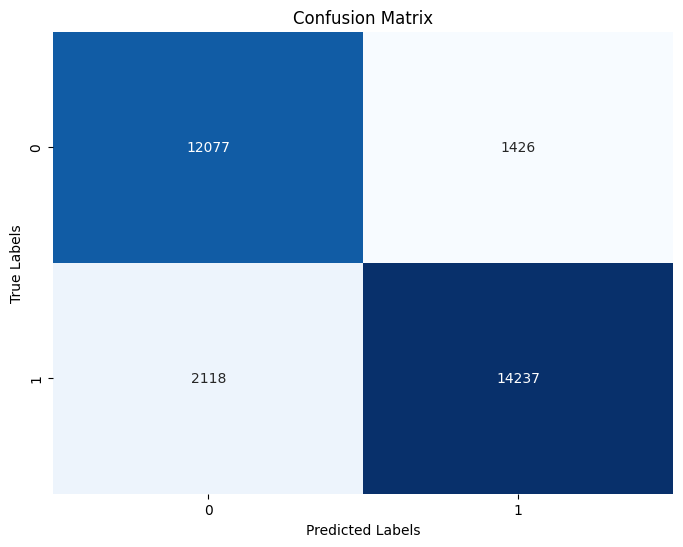

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     13503
           1       0.91      0.87      0.89     16355

    accuracy                           0.88     29858
   macro avg       0.88      0.88      0.88     29858
weighted avg       0.88      0.88      0.88     29858

                          Feature  Importance
2                    shipping_day    0.177281
3                       order_day    0.164875
0   Days for shipment (scheduled)    0.131853
1    Shipping Mode_Standard Class    0.091655
4          Order Profit Per Order    0.066929
6         Order Item Profit Ratio    0.051703
5                Order Item Total    0.050811
7             Order Item Discount    0.045179
9                  shipping_month    0.040794
12   Order Status_SUSPECTED_FRAUD    0.037806


In [48]:
# train the model on the full training data
best_rf.fit(X_train_top, y_train)

# Evaluate the model on the test data
test_accuracy = best_rf.score(X_test_top, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict the test set
y_pred = best_rf.predict(X_test_top)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print(class_report)

# Display the feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for the features and their importances
feature_importance_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': feature_importances
})

# Sort the DataFrame in descending order of the feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))



Final Test Accuracy: 0.8901

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13503
           1       0.91      0.89      0.90     16355

    accuracy                           0.89     29858
   macro avg       0.89      0.89      0.89     29858
weighted avg       0.89      0.89      0.89     29858



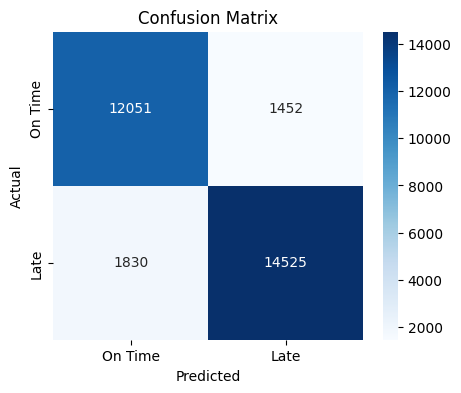

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the best model on the full training set
best_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use the best model from CV
best_model.fit(X_train_top, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_top)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["On Time", "Late"], yticklabels=["On Time", "Late"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

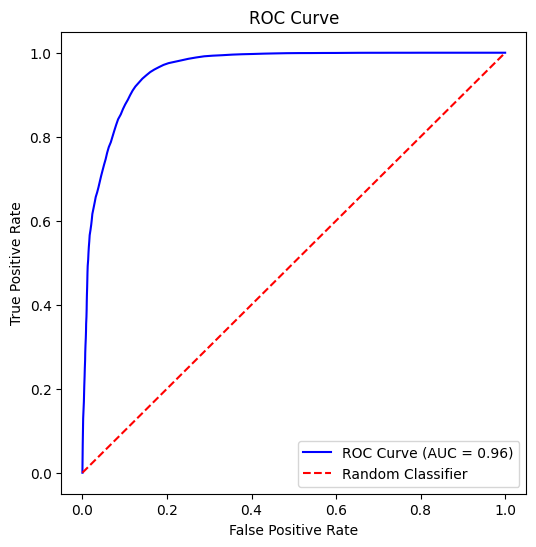

In [49]:
# Ensure y_test is of integer type
y_test = y_test.astype(int)

# Get the predicted probabilities for the positive class (Late)
y_probs = best_model.predict_proba(X_test_top)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
